# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... Predicting a number.

In [130]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.12.0


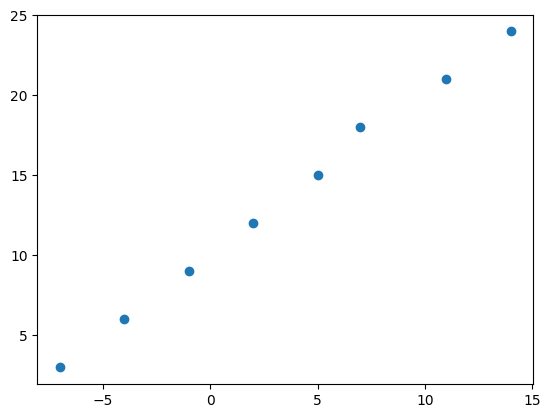

In [131]:
# Creating data to view and fit

import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,7.0,11.0,14.0])
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visualize it
plt.scatter(X,y)

In [132]:
y == X + 10

array([ True,  True,  True,  True,  True, False,  True,  True])

In [133]:
## Input and output shapes

# Create a demo tensor for our housing price prediction problem

house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [134]:
input_shape = X.shape
output_shape = y.shape
input_shape , output_shape

((8,), (8,))

In [135]:
#Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  7., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [136]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

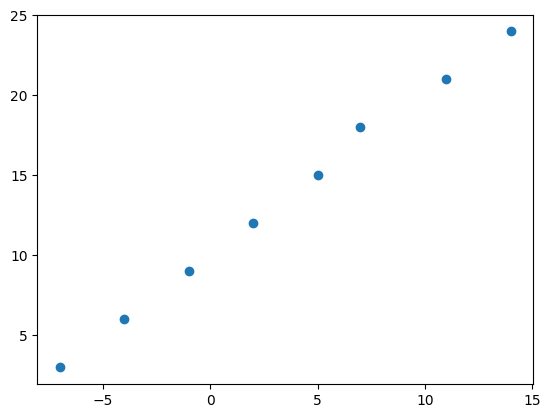

In [137]:
plt.scatter(X,y)

# Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers as well as the hidden layers of a deep learning model
2. **Compiling a model** - define the loss func (the function which telss our model how wront it is) and optimizer (tells our model how to improve the patterns it's learning) and evaluation metrics (what we can use to interpret the performance of our model)
3. **Fitting a model** -letting the model try to find patters between X and y (features and labels)

In [138]:
tf.random.set_seed(42)


# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(), # Stochastic Gradient Descent
              metrics = ["mae"]
              )
# Loss = mean(abs(y_true - y_pred), axis = 1)

# 3. Fit the model

model.fit(tf.expand_dims(X, axis=-1), y, epochs=150)
# I had to expand the dimension of X feature by using tf.expand_dims()


Epoch 1/150
1/1 [==============================] - 0s 371ms/step - loss: 9.1875 - mae: 9.1875
Epoch 2/150
1/1 [==============================] - 0s 10ms/step - loss: 9.0636 - mae: 9.0636
Epoch 3/150
1/1 [==============================] - 0s 11ms/step - loss: 8.9397 - mae: 8.9397
Epoch 4/150
1/1 [==============================] - 0s 11ms/step - loss: 8.8158 - mae: 8.8158
Epoch 5/150
1/1 [==============================] - 0s 9ms/step - loss: 8.6919 - mae: 8.6919
Epoch 6/150
1/1 [==============================] - 0s 13ms/step - loss: 8.5680 - mae: 8.5680
Epoch 7/150
1/1 [==============================] - 0s 11ms/step - loss: 8.4441 - mae: 8.4441
Epoch 8/150
1/1 [==============================] - 0s 9ms/step - loss: 8.3202 - mae: 8.3202
Epoch 9/150
1/1 [==============================] - 0s 9ms/step - loss: 8.1963 - mae: 8.1963
Epoch 10/150
1/1 [==============================] - 0s 9ms/step - loss: 8.0724 - mae: 8.0724
Epoch 11/150
1/1 [==============================] - 0s 11ms/step - loss:

In [139]:
# Check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  7., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [140]:
#Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 66ms/step


array([[29.219501]], dtype=float32)

In [141]:
y_pred + 6

array([[35.2195]], dtype=float32)

## Improve our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - Here we might add more layers, increase the number of hidden units(neurons), change the activation func of each layer
2. **Compiling a model** - Here we might change the optimization function or perhaps the __learning rate__ of the optimization func.
3. **Fitting a model** - Here we might fit a model for model __epochs__ (leave it training for longer)


In [142]:
# 1. Create a model (specified to your problem)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1)
])


# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr = 0.0001),
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1),y, epochs = 194)

Epoch 1/194
1/1 [==============================] - 1s 924ms/step - loss: 13.1321 - mae: 13.1321
Epoch 2/194
1/1 [==============================] - 0s 12ms/step - loss: 12.8261 - mae: 12.8261
Epoch 3/194
1/1 [==============================] - 0s 10ms/step - loss: 12.5298 - mae: 12.5298
Epoch 4/194
1/1 [==============================] - 0s 11ms/step - loss: 12.2417 - mae: 12.2417
Epoch 5/194
1/1 [==============================] - 0s 10ms/step - loss: 11.9447 - mae: 11.9447
Epoch 6/194
1/1 [==============================] - 0s 9ms/step - loss: 11.6479 - mae: 11.6479
Epoch 7/194
1/1 [==============================] - 0s 16ms/step - loss: 11.3389 - mae: 11.3389
Epoch 8/194
1/1 [==============================] - 0s 11ms/step - loss: 11.0237 - mae: 11.0237
Epoch 9/194
1/1 [==============================] - 0s 10ms/step - loss: 10.7069 - mae: 10.7069
Epoch 10/194
1/1 [==============================] - 0s 10ms/step - loss: 10.3782 - mae: 10.3782
Epoch 11/194
1/1 [==============================]

In [143]:
model.predict([17.0])

1/1 [==============================] - 0s 93ms/step


array([[27.074566]], dtype=float32)

# Common ways to improve a deep model
* Adding layers
* Increase the number of hidden units
* Change the activation functions
* Change the optimization function
* Change the learning rate
* Fitting on more data
* Fitting for longer (Easy)

## Evaluting a model

Build a model - fit it - evaluate it- tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like
* The training of a model - how does a model perform while it learns
* The predictions of the model - how do the predictions of model line up against the ground truth

In [144]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [145]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

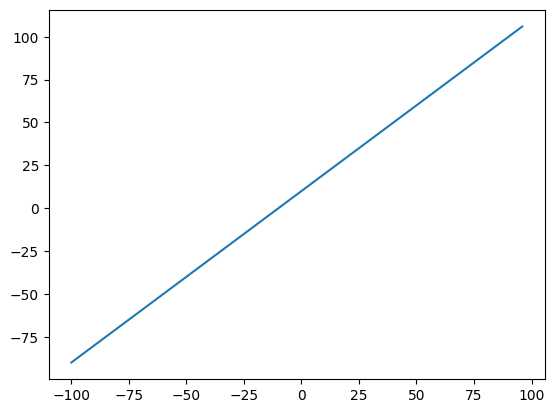

In [146]:
# Visualize the data
import matplotlib.pyplot as plt
plt.plot(X,y)

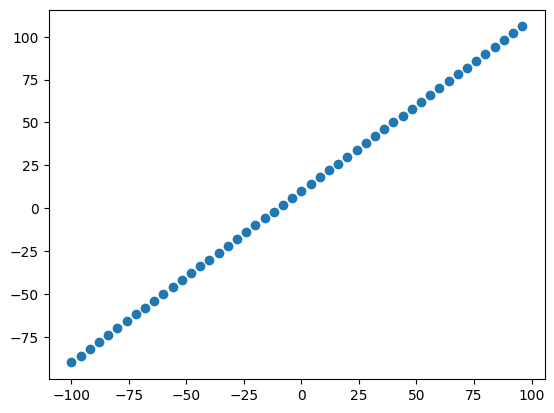

In [147]:
plt.scatter(X,y)

### The 3 sets...

* Training set - the model learns from this data, which is typically 70-80% of the total data you have available
* Validation set - the model gets tuned on this data, which is typically 10-15% of the data available
* Test set - the model gets evaluated on this data to test what is has learned, this set is typically 10-10% of the total data available

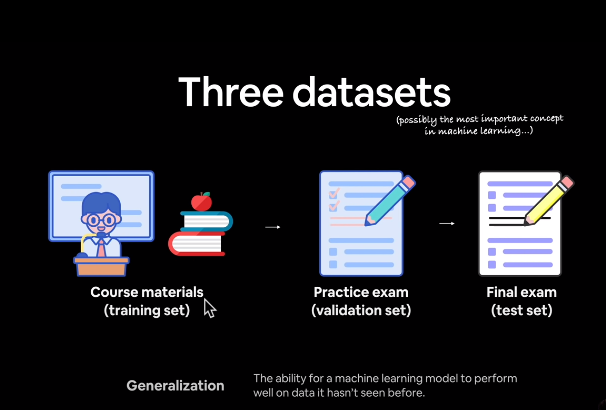

In [148]:
#Check the length of how many samples we have
len(X)

50

In [180]:
# Split the data into train and test set
X_train = X[:40]
y_train = y[:40]

y_test = y[40:]
X_test = X[40:]

### Visualin the data

Now we've got our data in training and test sets... Let's visualize it again!

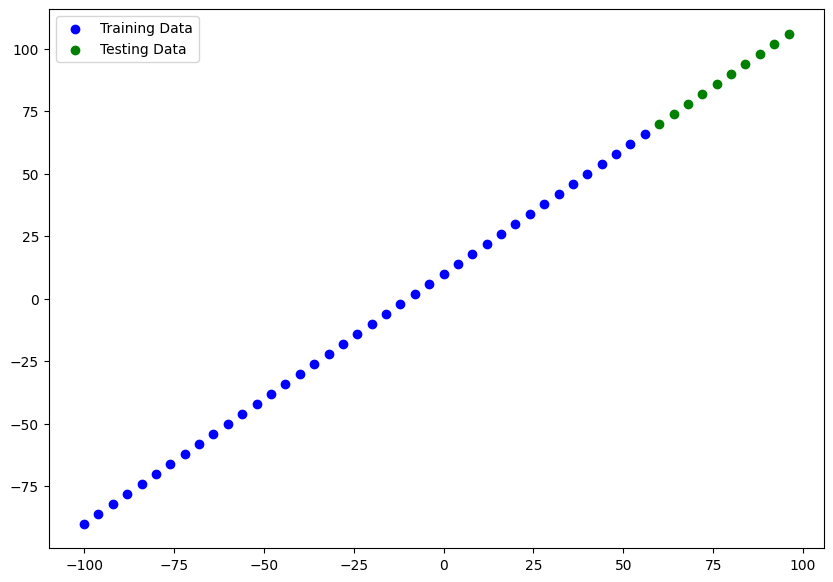

In [150]:
plt.figure(figsize=(10,7))
# Plot training data in blıue
plt.scatter(X_train, y_train, c="b", label="Training Data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label ="Testing Data")
# Show a Legend
plt.legend();

In [151]:
# Let's have a look at how to build a neural network for our data

tf.random.set_seed(42)


# 1. Create a model using the Sequential API
model_S = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1)
])
# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["mae"]
              )
# Loss = mean(abs(y_true - y_pred), axis = 1)

# 3. Fit the model

model.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs=200, verbose = 1)
# I had to expand the dimension of X feature by using tf.expand_dims()



Epoch 1/200
2/2 [==============================] - 1s 18ms/step - loss: 28.6819 - mae: 28.6819
Epoch 2/200
2/2 [==============================] - 0s 13ms/step - loss: 26.0336 - mae: 26.0336
Epoch 3/200
2/2 [==============================] - 0s 8ms/step - loss: 24.5322 - mae: 24.5322
Epoch 4/200
2/2 [==============================] - 0s 10ms/step - loss: 23.0884 - mae: 23.0884
Epoch 5/200
2/2 [==============================] - 0s 12ms/step - loss: 21.8939 - mae: 21.8939
Epoch 6/200
2/2 [==============================] - 0s 9ms/step - loss: 20.7887 - mae: 20.7887
Epoch 7/200
2/2 [==============================] - 0s 8ms/step - loss: 19.4920 - mae: 19.4920
Epoch 8/200
2/2 [==============================] - 0s 8ms/step - loss: 18.5142 - mae: 18.5142
Epoch 9/200
2/2 [==============================] - 0s 9ms/step - loss: 16.7437 - mae: 16.7437
Epoch 10/200
2/2 [==============================] - 0s 9ms/step - loss: 15.1930 - mae: 15.1930
Epoch 11/200
2/2 [==============================] - 0s 

* Total Params - Total number of parameters in the model
* Trainable Params - These are the parameters the model can update as it trains
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during)



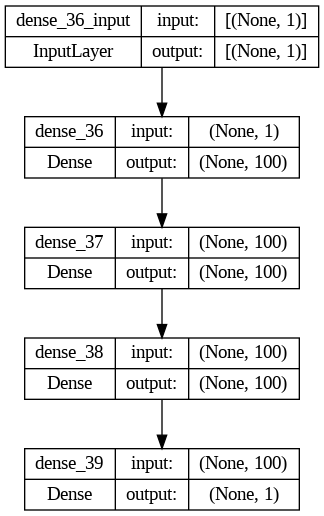

In [153]:
from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes = True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels

Often you'll see this in the form of "y_test"
 or "y_true" versus "y_pred"


In [154]:
# Make prediction
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 72ms/step


array([[ 70.64229 ],
       [ 74.72596 ],
       [ 78.80963 ],
       [ 82.89331 ],
       [ 86.97699 ],
       [ 91.072296],
       [ 95.16996 ],
       [ 99.27005 ],
       [103.401474],
       [107.55692 ]], dtype=float32)

**Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn into a function

In [155]:
# Let's create a plotting function
def plot_prediction(training_data = X_train,
                    training_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions = y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels
  """
  plt.figure(figsize = (10,7))
  # Plot training data in blue
  plt.scatter(training_data, training_labels, c="b", label="Training Data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label ="Testing Data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label = "Predictions")
  # Show the legend
  plt.legend();


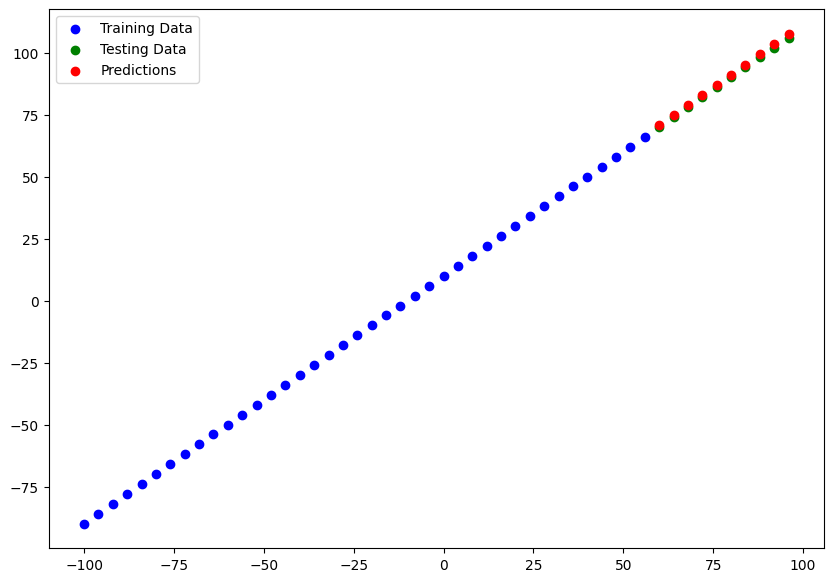

In [156]:
plot_prediction()

# Evaluting our model's predictions with regression evalution metrics

Since we're working on a regression, two of the main metrics:
* MAE - Mean Absolute Error
* MSE - Mean Square Error "Square the average errors"

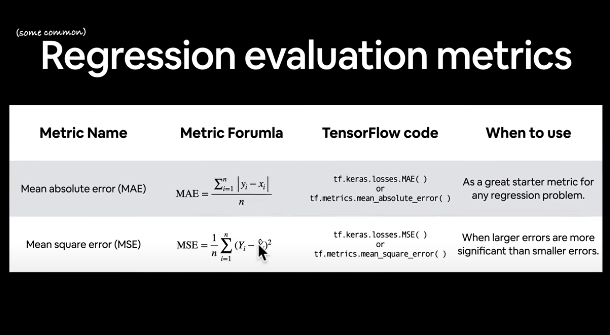

In [157]:
# Evalute the model on the test
print("Loss: ", model.evaluate(X_test, y_test)[0])
print("MAE: ", model.evaluate(X_test, y_test)[1])

1/1 [==============================] - 0s 153ms/step - loss: 1.0519 - mae: 1.0519
Loss:  1.0518882274627686
1/1 [==============================] - 0s 27ms/step - loss: 1.0519 - mae: 1.0519
MAE:  1.0518882274627686


In [158]:
# Calculate the mean absolute error
mae = tf.keras.losses.MAE(y_test,tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.48617 , 14.364424, 12.076147, 10.621338, 10.      , 10.214459,
       11.267984, 13.16203 , 15.921179, 19.556923], dtype=float32)>

In [159]:
y_test.shape

TensorShape([10])

In [160]:
y_pred.shape

(10, 1)

In [161]:
tf.squeeze(y_pred)


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.64229 ,  74.72596 ,  78.80963 ,  82.89331 ,  86.97699 ,
        91.072296,  95.16996 ,  99.27005 , 103.401474, 107.55692 ],
      dtype=float32)>

In [162]:
mae = tf.keras.losses.MAE(y_test,tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.48617 , 14.364424, 12.076147, 10.621338, 10.      , 10.214459,
       11.267984, 13.16203 , 15.921179, 19.556923], dtype=float32)>

In [163]:
# Calculate the mean square error
tf.keras.losses.MSE(y_test,tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=1.1867359>

# Running experiments to improve our model

Let's do 3 modelling experiments:
1. 'Model_1' - same as the original model, 1 layer, trained for 100 epochs
2. 'Model_2' - 2 layers, trained for 100 epochs
3. 'Model_3' - 2 layers, trained for 500 epochs

In [164]:
# FIRST MODEL

Model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

Model_1.compile(loss = "mae",
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

Model_1.fit(tf.expand_dims(X_train, axis = 1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 7ms/step - loss: 52.0831 - mae: 52.0831
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 18.7332 - mae: 18.7332
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 10.3877 - mae: 10.3877
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 9.3469 - mae: 9.3469
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 10.2206 - mae: 10.2206
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.4787 - mae: 9.4787
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 8.6124 - mae: 8.6124
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0587 - mae: 9.0587
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 18.8354 - mae: 18.8354
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1689 - mae: 10.1689
Epoch 11/100
2/2 [==============================] - 0s 6ms/step

In [165]:
Model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100)
])

Model_2.compile(loss= "mae",
               optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])

Model_2.fit(tf.expand_dims(X_train, axis= 1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 7ms/step - loss: 40.2783 - mae: 40.2783
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 39.2187 - mae: 39.2187
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 38.1961 - mae: 38.1961
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 37.1401 - mae: 37.1401
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 36.0963 - mae: 36.0963
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 35.0293 - mae: 35.0293
Epoch 7/100
2/2 [==============================] - 0s 40ms/step - loss: 33.9226 - mae: 33.9226
Epoch 8/100
2/2 [==============================] - 0s 12ms/step - loss: 32.7547 - mae: 32.7547
Epoch 9/100
2/2 [==============================] - 0s 32ms/step - loss: 31.6320 - mae: 31.6320
Epoch 10/100
2/2 [==============================] - 0s 31ms/step - loss: 30.4801 - mae: 30.4801
Epoch 11/100
2/2 [==============================] - 0s 

In [166]:
Model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100)
])

Model_3.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])

Model_3.fit(tf.expand_dims(X_train, axis = 1), y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 1s 9ms/step - loss: 41.8390 - mae: 41.8390
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 40.6544 - mae: 40.6544
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 39.5161 - mae: 39.5161
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 38.3471 - mae: 38.3471
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 37.1992 - mae: 37.1992
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 36.0334 - mae: 36.0334
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 34.8343 - mae: 34.8343
Epoch 8/500
2/2 [==============================] - 0s 9ms/step - loss: 33.5781 - mae: 33.5781
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 32.3798 - mae: 32.3798
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 31.1566 - mae: 31.1566
Epoch 11/500
2/2 [==============================] - 0s 8ms/

##Tracking your experiments

One really good habit in ML modelling is to track the results of your experiments.

And Whe ndoing so, it can de tedious if you're running lots of experiments.

Luckily, there are tools to help us

## Saving our models

Saving our models allows us to use them outside of Google Colab, such as in a web app or a mobile app.

There are two main formats we can save our model's too:

* The SavedModel Format
* The HDF5 format


In [169]:
#Save model using the SavedModel Format

Model_3.save("best_model_SavedModel_format")

In [170]:
#Save model using the HDF5 Format
Model_3.save("Best_Model.hdf5.h5")

# Loading in a saved model

In [173]:
# Load in the SavedModel format model

loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")

In [185]:
Model_3_preds = Model_3.predict(X_test)
Assign_X_test = X_test
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(Assign_X_test)
Model_3_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 41ms/step


array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  Tru